# 12S19001 - Raynaldo Silalahi
# 12S19009 - Manuel Sigalingging
# 12S19040 - Abel Tampubolon

In [1]:
import pandas as pd
import numpy as np 
from numpy.core.defchararray import add

In [2]:
data = pd.read_csv("fraud_detection_train.csv")

## Data Understanding

In [3]:
# View the data size
data.shape

(200217, 53)

In [4]:
# View attribute type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   visit_id       200217 non-null  int64 
 1   kdkc           200217 non-null  int64 
 2   dati2          200217 non-null  int64 
 3   typeppk        200217 non-null  object
 4   jkpst          200217 non-null  object
 5   umur           200217 non-null  int64 
 6   jnspelsep      200217 non-null  int64 
 7   los            200217 non-null  int64 
 8   cmg            200217 non-null  object
 9   severitylevel  200217 non-null  int64 
 10  diagprimer     200217 non-null  object
 11  dx2_a00_b99    200217 non-null  int64 
 12  dx2_c00_d48    200217 non-null  int64 
 13  dx2_d50_d89    200217 non-null  int64 
 14  dx2_e00_e90    200217 non-null  int64 
 15  dx2_f00_f99    200217 non-null  int64 
 16  dx2_g00_g99    200217 non-null  int64 
 17  dx2_h00_h59    200217 non-null  int64 
 18  dx2_

In [5]:
data.describe()

,visit_id,kdkc,dati2,umur,jnspelsep,los,severitylevel,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
count,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,...,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.0,200217.000000
mean,100109.000000,1147.367816,184.793309,36.850602,1.669778,1.303356,0.444003,0.024893,0.008341,0.020703,...,0.005050,0.008381,0.016472,0.018370,0.001518,0.007457,0.847061,0.009225,0.0,0.500732
std,57797.813761,574.486224,107.226676,23.095928,0.470294,5.639751,0.725227,0.162484,0.093386,0.146842,...,0.073984,0.094393,0.155667,0.144878,0.043995,0.100441,1.301645,0.095603,0.0,0.500001
min,1.000000,101.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,50055.000000,903.000000,114.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,100109.000000,1101.000000,169.000000,39.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,150163.000000,1314.000000,232.000000,56.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000
max,200217.000000,2606.000000,528.000000,109.000000,2.000000,592.000000,3.000000,4.000000,3.000000,3.000000,...,3.000000,2.000000,4.000000,4.000000,3.000000,7.000000,23.000000,1.000000,0.0,1.000000


In [6]:
data.columns

Index(['visit_id', 'kdkc', 'dati2', 'typeppk', 'jkpst', 'umur', 'jnspelsep',
       'los', 'cmg', 'severitylevel', 'diagprimer', 'dx2_a00_b99',
       'dx2_c00_d48', 'dx2_d50_d89', 'dx2_e00_e90', 'dx2_f00_f99',
       'dx2_g00_g99', 'dx2_h00_h59', 'dx2_h60_h95', 'dx2_i00_i99',
       'dx2_j00_j99', 'dx2_koo_k93', 'dx2_l00_l99', 'dx2_m00_m99',
       'dx2_n00_n99', 'dx2_o00_o99', 'dx2_p00_p96', 'dx2_q00_q99',
       'dx2_r00_r99', 'dx2_s00_t98', 'dx2_u00_u99', 'dx2_v01_y98',
       'dx2_z00_z99', 'proc00_13', 'proc14_23', 'proc24_27', 'proc28_28',
       'proc29_31', 'proc_32_38', 'proc39_45', 'proc46_51', 'proc52_57',
       'proc58_62', 'proc63_67', 'proc68_70', 'proc71_73', 'proc74_75',
       'proc76_77', 'proc78_79', 'proc80_99', 'proce00_e99', 'procv00_v89',
       'label'],
      dtype='object')

In [7]:
# view the head data
data.head()

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,...,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
data.nunique() 

visit_id         200217
kdkc                126
dati2               486
typeppk              25
jkpst                 2
umur                105
jnspelsep             2
los                 142
cmg                  23
severitylevel         4
diagprimer           21
dx2_a00_b99           5
dx2_c00_d48           4
dx2_d50_d89           4
dx2_e00_e90           7
dx2_f00_f99           3
dx2_g00_g99           5
dx2_h00_h59           5
dx2_h60_h95           4
dx2_i00_i99           7
dx2_j00_j99           5
dx2_koo_k93           1
dx2_l00_l99           4
dx2_m00_m99           4
dx2_n00_n99           5
dx2_o00_o99           7
dx2_p00_p96          14
dx2_q00_q99           7
dx2_r00_r99           5
dx2_s00_t98           8
dx2_u00_u99           1
dx2_v01_y98           3
dx2_z00_z99           6
proc00_13             5
proc14_23             6
proc24_27             4
proc28_28             3
proc29_31             3
proc_32_38            6
proc39_45             5
proc46_51             4
proc52_57       

In [9]:
data.notnull()

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200212,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
200213,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
200214,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
200215,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [10]:
# Check the missing value in dataset
data.isnull().sum()

visit_id         0
kdkc             0
dati2            0
typeppk          0
jkpst            0
umur             0
jnspelsep        0
los              0
cmg              0
severitylevel    0
diagprimer       0
dx2_a00_b99      0
dx2_c00_d48      0
dx2_d50_d89      0
dx2_e00_e90      0
dx2_f00_f99      0
dx2_g00_g99      0
dx2_h00_h59      0
dx2_h60_h95      0
dx2_i00_i99      0
dx2_j00_j99      0
dx2_koo_k93      0
dx2_l00_l99      0
dx2_m00_m99      0
dx2_n00_n99      0
dx2_o00_o99      0
dx2_p00_p96      0
dx2_q00_q99      0
dx2_r00_r99      0
dx2_s00_t98      0
dx2_u00_u99      0
dx2_v01_y98      0
dx2_z00_z99      0
proc00_13        0
proc14_23        0
proc24_27        0
proc28_28        0
proc29_31        0
proc_32_38       0
proc39_45        0
proc46_51        0
proc52_57        0
proc58_62        0
proc63_67        0
proc68_70        0
proc71_73        0
proc74_75        0
proc76_77        0
proc78_79        0
proc80_99        0
proce00_e99      0
procv00_v89      0
label       

In [11]:
# Check the dataset
All = data.shape[0]
fraud = data[data['label'] == 1]
nonFraud = data[data['label'] == 0]

totalFraud = len(fraud)/All
totalNonFraud = len(nonFraud)/All

print('frauds :', totalFraud * 100, '%')
print('non Frauds : ', totalNonFraud * 100, '&')

frauds : 50.07317060988827 %
non Frauds :  49.92682939011173 &


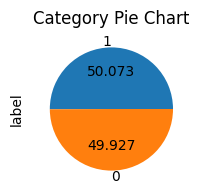

1    100255
0     99962
Name: label, dtype: int64

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
data['label'].value_counts().plot(kind='pie',autopct='%.3f')
plt.title('Category Pie Chart')
plt.show()

data['label'].value_counts()

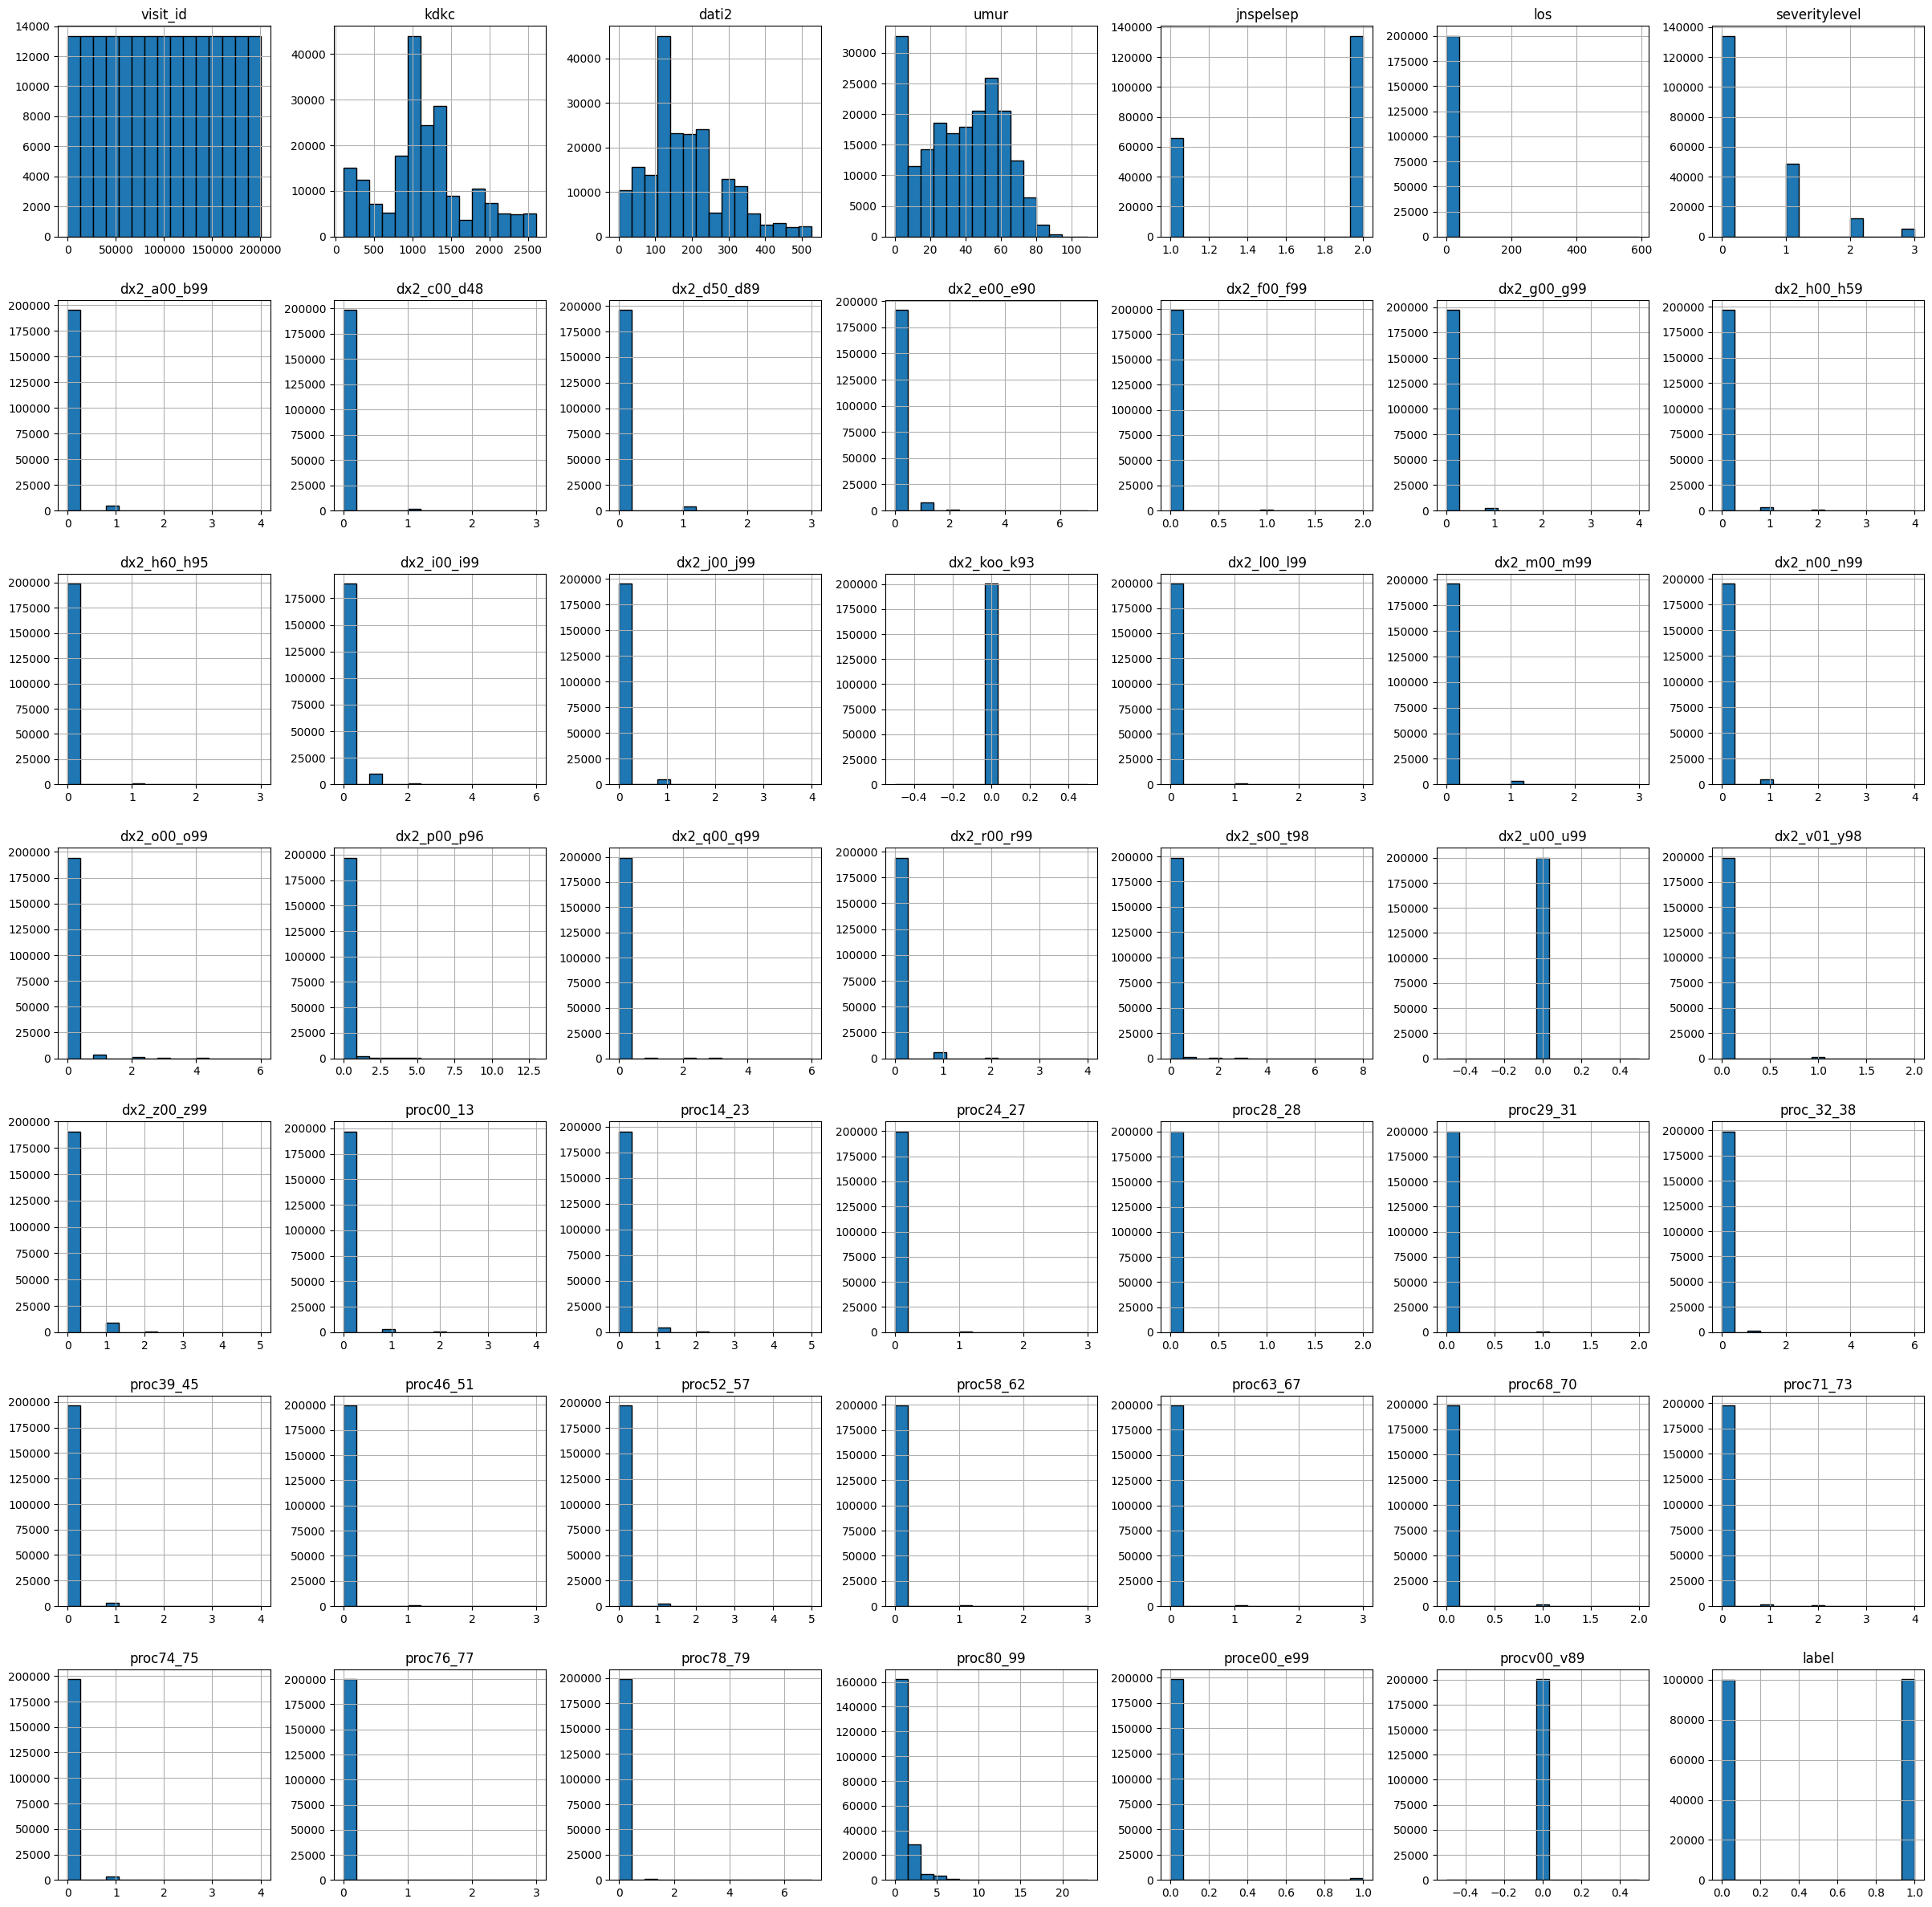

In [13]:
## Showing all variables in histogram
data.hist(edgecolor = 'black', bins = 15, figsize = (30, 30));

<AxesSubplot:title={'center':'los'}, xlabel='label'>

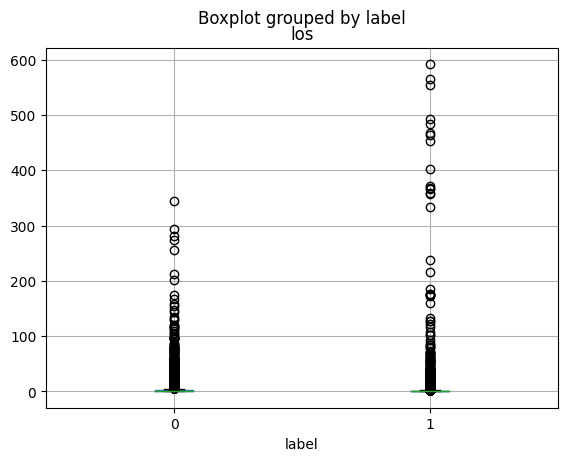

In [14]:
# Check the outlier in dataset

data.boxplot(column='los', by='label')

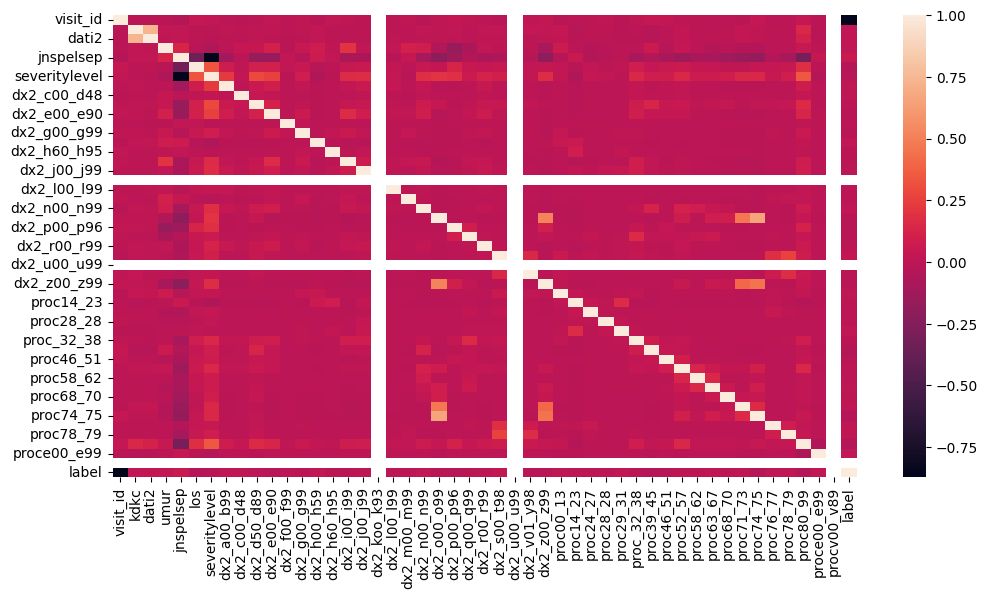

In [15]:
## Show correlation heatmap 
import matplotlib.pyplot as plt
import seaborn as sns

atribut = data.columns
correlations = data[atribut].corr()

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(correlations, ax = ax);

In [16]:
# pip install seaborn

# Data Preparation

### Selecting data

In [17]:
# Selecting data
# Drop unused attribute

data.drop(['visit_id', 'procv00_v89', 'dx2_koo_k93', 'dx2_u00_u99', 'dati2' ], axis=1, inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 48 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   kdkc           200217 non-null  int64 
 1   typeppk        200217 non-null  object
 2   jkpst          200217 non-null  object
 3   umur           200217 non-null  int64 
 4   jnspelsep      200217 non-null  int64 
 5   los            200217 non-null  int64 
 6   cmg            200217 non-null  object
 7   severitylevel  200217 non-null  int64 
 8   diagprimer     200217 non-null  object
 9   dx2_a00_b99    200217 non-null  int64 
 10  dx2_c00_d48    200217 non-null  int64 
 11  dx2_d50_d89    200217 non-null  int64 
 12  dx2_e00_e90    200217 non-null  int64 
 13  dx2_f00_f99    200217 non-null  int64 
 14  dx2_g00_g99    200217 non-null  int64 
 15  dx2_h00_h59    200217 non-null  int64 
 16  dx2_h60_h95    200217 non-null  int64 
 17  dx2_i00_i99    200217 non-null  int64 
 18  dx2_

In [19]:
data.columns

Index(['kdkc', 'typeppk', 'jkpst', 'umur', 'jnspelsep', 'los', 'cmg',
       'severitylevel', 'diagprimer', 'dx2_a00_b99', 'dx2_c00_d48',
       'dx2_d50_d89', 'dx2_e00_e90', 'dx2_f00_f99', 'dx2_g00_g99',
       'dx2_h00_h59', 'dx2_h60_h95', 'dx2_i00_i99', 'dx2_j00_j99',
       'dx2_l00_l99', 'dx2_m00_m99', 'dx2_n00_n99', 'dx2_o00_o99',
       'dx2_p00_p96', 'dx2_q00_q99', 'dx2_r00_r99', 'dx2_s00_t98',
       'dx2_v01_y98', 'dx2_z00_z99', 'proc00_13', 'proc14_23', 'proc24_27',
       'proc28_28', 'proc29_31', 'proc_32_38', 'proc39_45', 'proc46_51',
       'proc52_57', 'proc58_62', 'proc63_67', 'proc68_70', 'proc71_73',
       'proc74_75', 'proc76_77', 'proc78_79', 'proc80_99', 'proce00_e99',
       'label'],
      dtype='object')

### Cleaning Data

In [20]:
# Checking missing values

A = (data.dtypes == 'object')
CategoricalVariables = list(A[A].index)

Integer = (data.dtypes == 'int64')
Float = (data.dtypes == 'float64')
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

Missing_Percentage = (data.isnull().sum()).sum()/np.product(data.shape)*100
print("Total nilai yang missing sebelum dibersihkan: " + str(round(Missing_Percentage,5)) + "%" )

Total nilai yang missing sebelum dibersihkan: 0.0%


### Binning Dataset

In [21]:
# Binning dataset attribute umur

import numpy as np
import math
from sklearn.datasets import load_iris
from sklearn import datasets, linear_model, metrics

bin_limit = [-1 , 2, 11, 20, 61, 120]
category = ['satu', 'dua', 'tiga', 'empat', 'lima']
data['umur'] = pd.cut(data['umur'], bins=bin_limit, labels=category)
data

,kdkc,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,dx2_a00_b99,...,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,label
0,1107,SB,P,lima,2,0,F,0,f00_f99,0,...,0,0,0,0,0,0,0,0,0,1
1,1303,C,L,empat,1,9,E,3,e00_e90,1,...,0,0,0,0,0,0,0,4,0,1
2,1114,B,P,empat,2,0,Q,0,r00_r99,0,...,0,0,0,0,0,0,0,0,0,1
3,601,SC,L,empat,2,0,Q,0,r00_r99,0,...,0,0,0,0,0,0,0,0,0,1
4,1006,B,L,empat,2,0,F,0,f00_f99,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200212,2102,B,P,empat,2,0,Z,0,l00_l99,0,...,0,0,0,0,0,0,0,1,0,0
200213,1308,SD,L,satu,2,0,Q,0,q00_q99,0,...,0,0,0,0,0,0,0,0,0,0
200214,201,SB,P,dua,2,0,Q,0,r00_r99,0,...,0,0,0,0,0,0,0,0,0,0
200215,1008,B,P,empat,1,1,J,1,j00_j99,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# binning dataset attribute los
import numpy as np  
import math
from sklearn.datasets import load_iris
from sklearn import datasets, linear_model, metrics 
  
bin_limit = [-1, 1, 6, 11, 800]
category = ['outpatient', 'short stay', 'medium stay', 'long stay']
data['los'] = pd.cut(data['los'], bins=bin_limit, labels=category)
data

,kdkc,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,dx2_a00_b99,...,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,label
0,1107,SB,P,lima,2,outpatient,F,0,f00_f99,0,...,0,0,0,0,0,0,0,0,0,1
1,1303,C,L,empat,1,medium stay,E,3,e00_e90,1,...,0,0,0,0,0,0,0,4,0,1
2,1114,B,P,empat,2,outpatient,Q,0,r00_r99,0,...,0,0,0,0,0,0,0,0,0,1
3,601,SC,L,empat,2,outpatient,Q,0,r00_r99,0,...,0,0,0,0,0,0,0,0,0,1
4,1006,B,L,empat,2,outpatient,F,0,f00_f99,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200212,2102,B,P,empat,2,outpatient,Z,0,l00_l99,0,...,0,0,0,0,0,0,0,1,0,0
200213,1308,SD,L,satu,2,outpatient,Q,0,q00_q99,0,...,0,0,0,0,0,0,0,0,0,0
200214,201,SB,P,dua,2,outpatient,Q,0,r00_r99,0,...,0,0,0,0,0,0,0,0,0,0
200215,1008,B,P,empat,1,outpatient,J,1,j00_j99,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
data['jkpst'].replace(to_replace=['L', 'P'], value =[0, 1], inplace=True)

### Construct Data

In [24]:
A = (data.dtypes == 'object')
B = (data.dtypes == 'category')
CategoricalVariables = list(A[A].index) + list (B[B].index)

Integer = (data.dtypes == 'int64')
Float = (data.dtypes == 'float64')
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

data_category = pd.get_dummies(data[CategoricalVariables], columns=CategoricalVariables)
data_numeric = data[NumericVariables]

data_dummy = pd.get_dummies(data[CategoricalVariables], columns=CategoricalVariables)
data_numeric = data[NumericVariables]

data_numeric["id"] = data_numeric.index + 1
data_dummy["id"] = data_dummy.index + 1
bpjs_final_data = pd.merge(data_dummy, data_numeric, on="id")
bpjs_final_data.drop(["id"], axis=1, inplace=True)
print("Dummy Transformation Succes")


C:\Users\TUF GAMING\AppData\Local\Temp\ipykernel_2292\2192816035.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric["id"] = data_numeric.index + 1


Dummy Transformation Succes


In [25]:
bpjs_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200217 entries, 0 to 200216
Columns: 121 entries, typeppk_A  to label
dtypes: int64(43), uint8(78)
memory usage: 82.1 MB


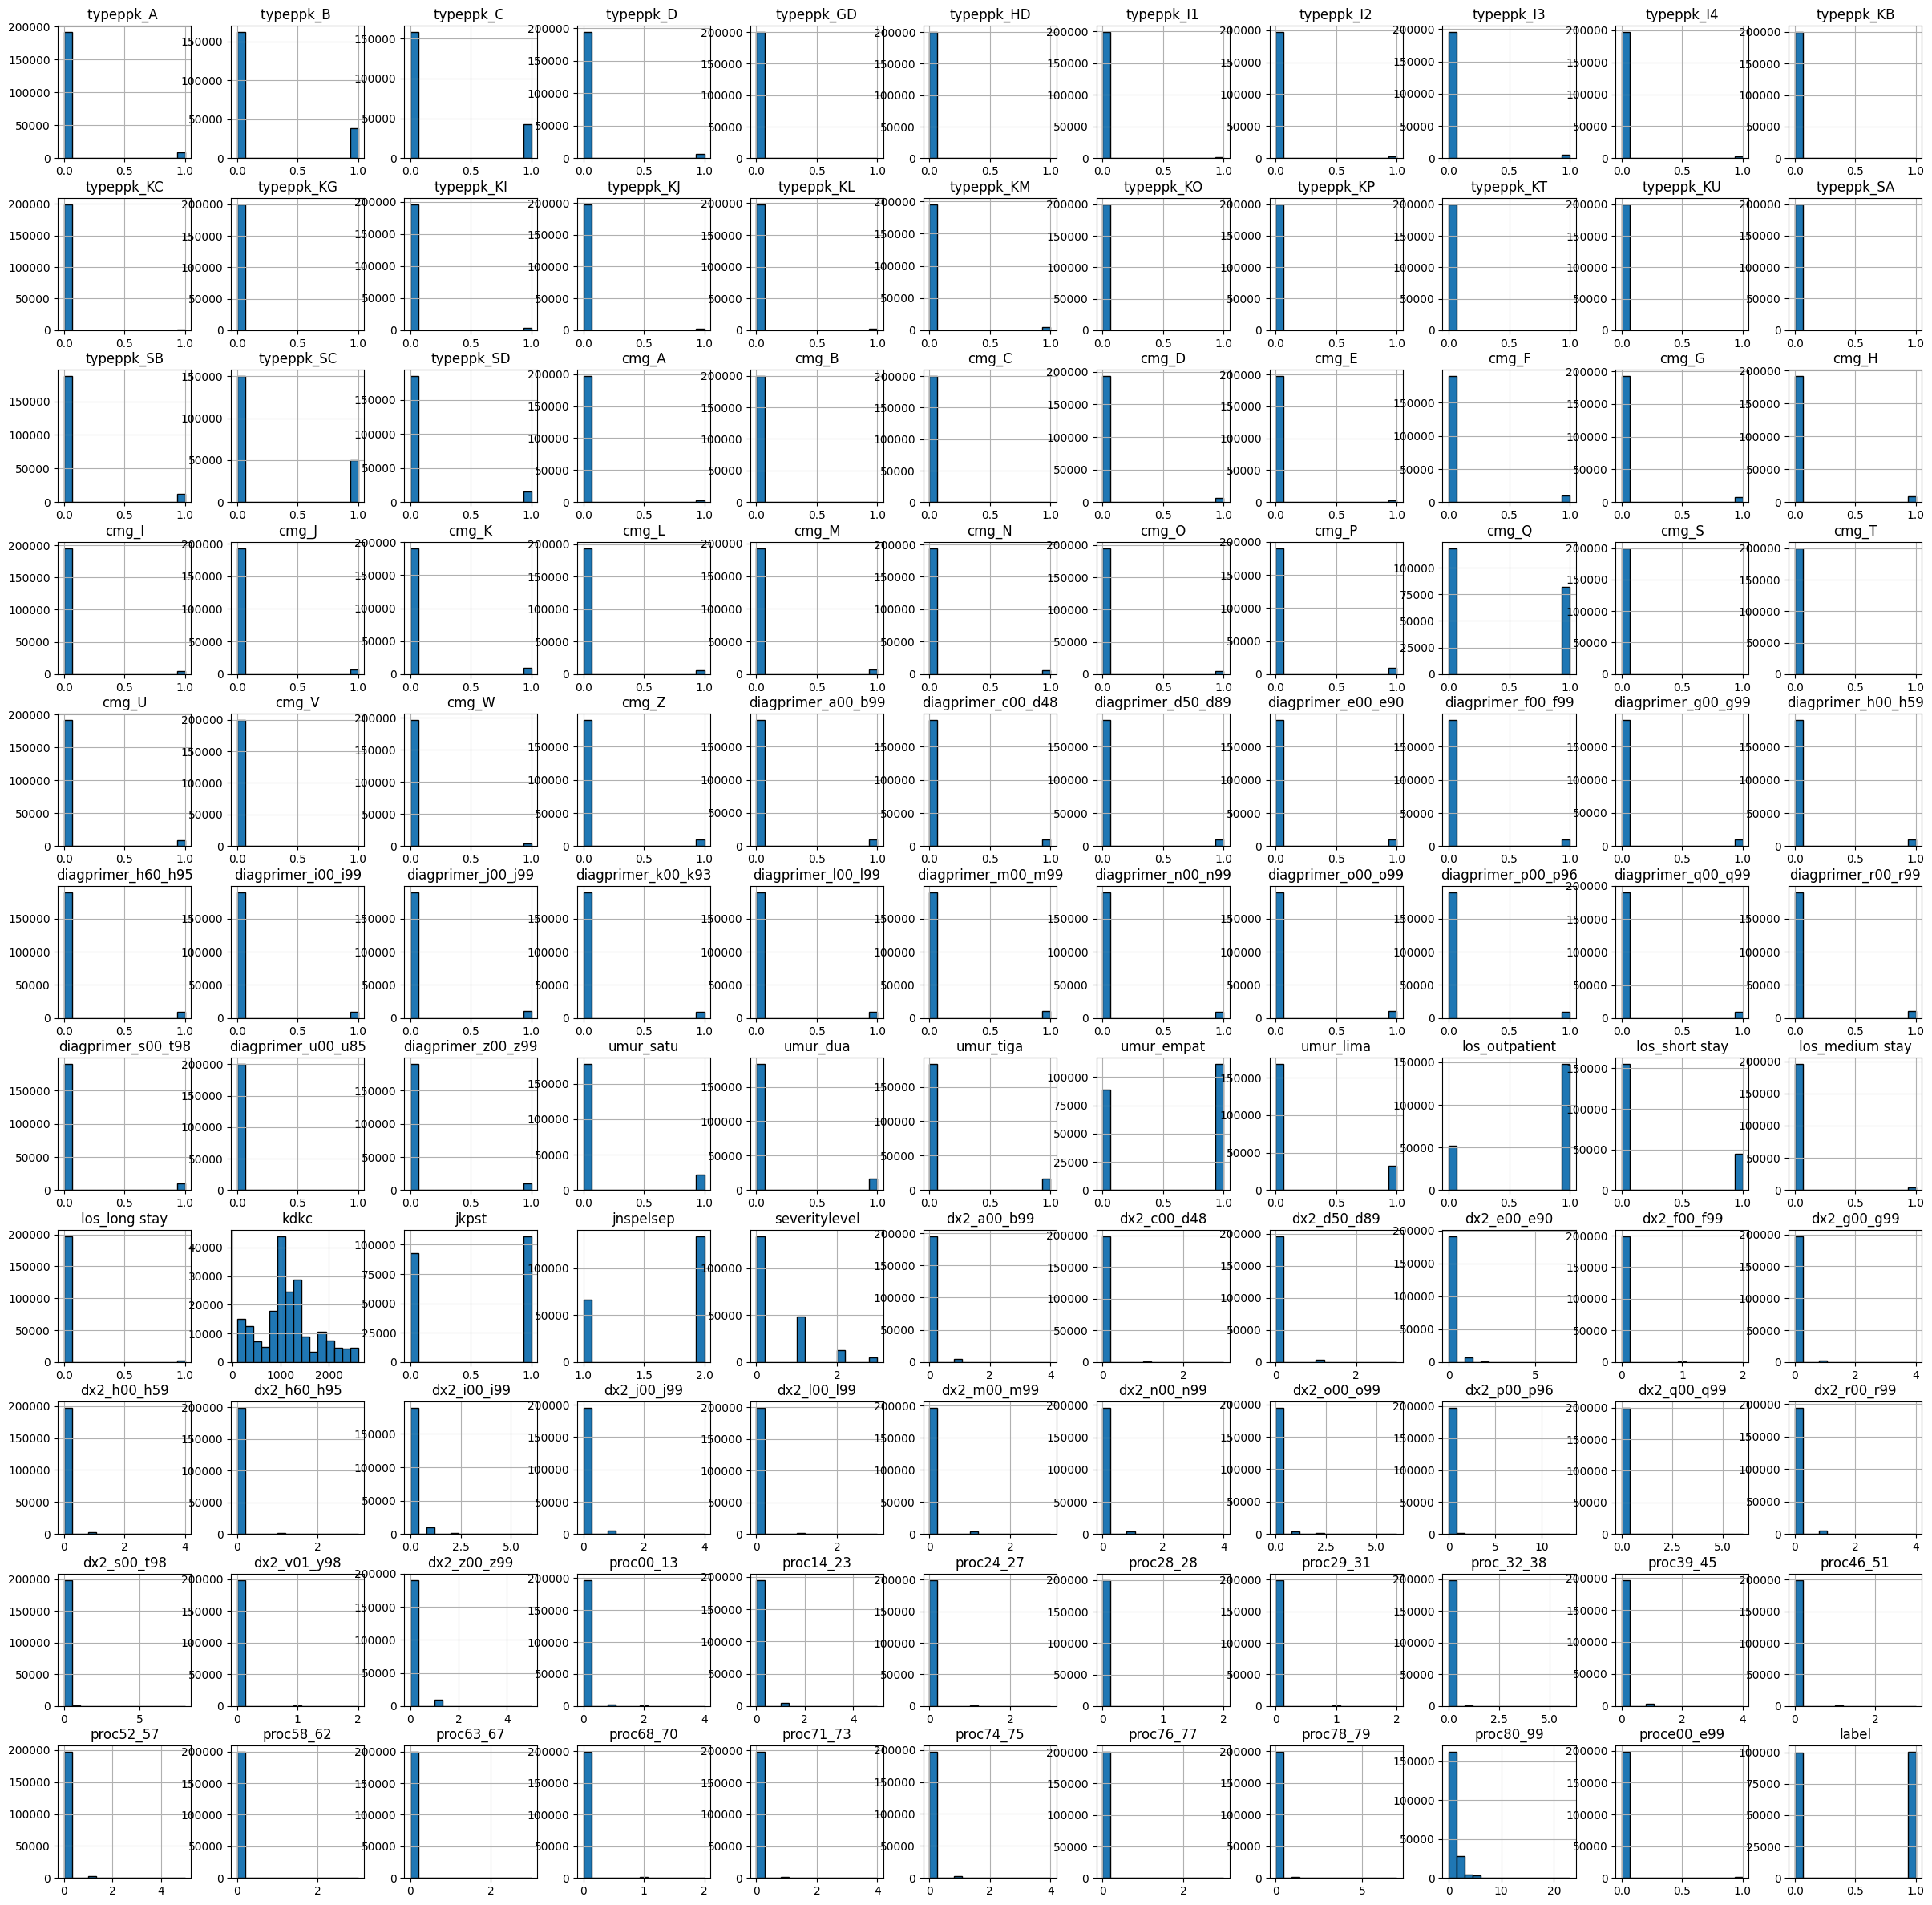

In [26]:
## Tampilkan histogram untuk semua atribut
bpjs_final_data.hist(edgecolor = 'black', bins = 15, figsize = (30, 30));

In [27]:
A = (bpjs_final_data.dtypes == 'object')
CategoricalVariables = list(A[A].index)

Integer = (bpjs_final_data.dtypes == 'int64')
Float = (bpjs_final_data.dtypes == 'float64')
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

Missing_Percentage = (data.isnull().sum()).sum()/np.product(data.shape)*100
print("The number of missing entries after cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries after cleaning: 0.0 %


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 48 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   kdkc           200217 non-null  int64   
 1   typeppk        200217 non-null  object  
 2   jkpst          200217 non-null  int64   
 3   umur           200217 non-null  category
 4   jnspelsep      200217 non-null  int64   
 5   los            200217 non-null  category
 6   cmg            200217 non-null  object  
 7   severitylevel  200217 non-null  int64   
 8   diagprimer     200217 non-null  object  
 9   dx2_a00_b99    200217 non-null  int64   
 10  dx2_c00_d48    200217 non-null  int64   
 11  dx2_d50_d89    200217 non-null  int64   
 12  dx2_e00_e90    200217 non-null  int64   
 13  dx2_f00_f99    200217 non-null  int64   
 14  dx2_g00_g99    200217 non-null  int64   
 15  dx2_h00_h59    200217 non-null  int64   
 16  dx2_h60_h95    200217 non-null  int64   
 17  dx2_i00_i9

### Standardization



In [29]:
# data.drop(['label'], axis=1, inplace=True)
X = bpjs_final_data.iloc[:,:-1].values
y = bpjs_final_data.iloc[:, -1].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
# standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler


# define standard scaler
scaler = StandardScaler()
# transform data
X = scaler.fit_transform(X)

print(X)
# transform data

[[-0.21087184 -0.4873673  -0.51753857 ... -0.07424171 -0.65076355
  -0.09649292]
 [-0.21087184 -0.4873673   1.93222313 ... -0.07424171  2.42227887
  -0.09649292]
 [-0.21087184  2.05184056 -0.51753857 ... -0.07424171 -0.65076355
  -0.09649292]
 ...
 [-0.21087184 -0.4873673  -0.51753857 ... -0.07424171 -0.65076355
  -0.09649292]
 [-0.21087184  2.05184056 -0.51753857 ... -0.07424171  0.11749706
  -0.09649292]
 [-0.21087184 -0.4873673  -0.51753857 ... -0.07424171 -0.65076355
  -0.09649292]]


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 48 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   kdkc           200217 non-null  int64   
 1   typeppk        200217 non-null  object  
 2   jkpst          200217 non-null  int64   
 3   umur           200217 non-null  category
 4   jnspelsep      200217 non-null  int64   
 5   los            200217 non-null  category
 6   cmg            200217 non-null  object  
 7   severitylevel  200217 non-null  int64   
 8   diagprimer     200217 non-null  object  
 9   dx2_a00_b99    200217 non-null  int64   
 10  dx2_c00_d48    200217 non-null  int64   
 11  dx2_d50_d89    200217 non-null  int64   
 12  dx2_e00_e90    200217 non-null  int64   
 13  dx2_f00_f99    200217 non-null  int64   
 14  dx2_g00_g99    200217 non-null  int64   
 15  dx2_h00_h59    200217 non-null  int64   
 16  dx2_h60_h95    200217 non-null  int64   
 17  dx2_i00_i9

In [32]:
data

,kdkc,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,diagprimer,dx2_a00_b99,...,proc58_62,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,label
0,1107,SB,1,lima,2,outpatient,F,0,f00_f99,0,...,0,0,0,0,0,0,0,0,0,1
1,1303,C,0,empat,1,medium stay,E,3,e00_e90,1,...,0,0,0,0,0,0,0,4,0,1
2,1114,B,1,empat,2,outpatient,Q,0,r00_r99,0,...,0,0,0,0,0,0,0,0,0,1
3,601,SC,0,empat,2,outpatient,Q,0,r00_r99,0,...,0,0,0,0,0,0,0,0,0,1
4,1006,B,0,empat,2,outpatient,F,0,f00_f99,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200212,2102,B,1,empat,2,outpatient,Z,0,l00_l99,0,...,0,0,0,0,0,0,0,1,0,0
200213,1308,SD,0,satu,2,outpatient,Q,0,q00_q99,0,...,0,0,0,0,0,0,0,0,0,0
200214,201,SB,1,dua,2,outpatient,Q,0,r00_r99,0,...,0,0,0,0,0,0,0,0,0,0
200215,1008,B,1,empat,1,outpatient,J,1,j00_j99,0,...,0,0,0,0,0,0,0,1,0,0


# Modelling

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.15)

print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)

X_train (153165, 120)
X_val (27030, 120)
X_test (20022, 120)


In [41]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(128, ), activation='relu', max_iter=1000, epsilon=1e-08)

In [42]:
from sklearn.metrics import accuracy_score

mlp.fit(X_train, Y_train)
val_predict = mlp.predict(X_val)
acc_val = accuracy_score(Y_val, val_predict)
print('Validation training accuration ANN:', acc_val)

Validation training accuration ANN: 0.6416204217536071


In [43]:
test_predict = mlp.predict(X_test)
acc_test = accuracy_score(Y_test, test_predict)
print('ANN testing accuracy:', acc_test)

ANN testing accuracy: 0.6414444111477375


C:\Users\TUF GAMING\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Akurasi Testing ANN:  0.6414444111477375


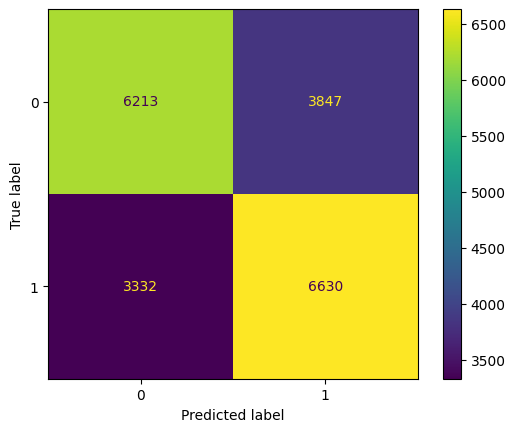

In [44]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

prediksi = mlp.predict(X_test)
plot_confusion_matrix(mlp, X_test, Y_test)
accuracy = accuracy_score(Y_test, prediksi)
print("Akurasi Testing ANN: ", accuracy)

[[6213 3847]
 [3332 6630]]


C:\Users\TUF GAMING\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


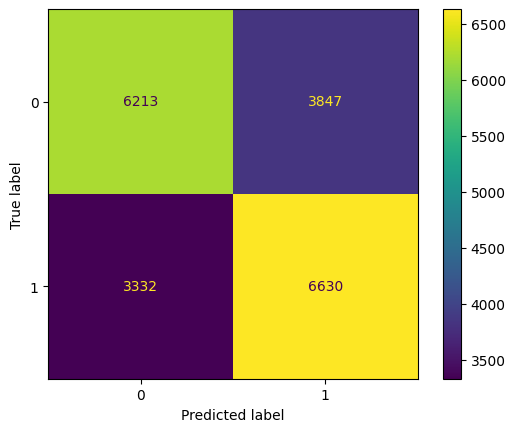

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(Y_test, prediksi))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(mlp, X_test, Y_test)
plt.show()

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



# Calculating the precision score of classifier
print(f"Accuracy Score of the classifier is: {accuracy_score(Y_test, prediksi)}")
print(f"Precision Score of the classifier is: {precision_score(Y_test, prediksi)}")
print(f"Recall Score of the classifier is: {recall_score(Y_test, prediksi)}")
print(f"F1 Score of the classifier is: {f1_score(Y_test, prediksi)}")

Accuracy Score of the classifier is: 0.6414444111477375
Precision Score of the classifier is: 0.6328147370430467
Recall Score of the classifier is: 0.6655290102389079
F1 Score of the classifier is: 0.6487597240569499


## Saving Model

In [49]:
# save the model to disk
import nltk
import pickle
filename = 'model.pkl'
pickle.dump(MLPClassifier, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)

In [48]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.5/1.5 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 267.7/267.7 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
data.to_csv(r'fraud_detection.csv')